<a href="https://colab.research.google.com/github/zberis/DSPS_ZBeris/blob/main/HW10/kerasmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [181]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [182]:
x_train = x_train.astype(float) / 255.
#y_train = y_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.
#y_test = y_test.astype(float) / 255.

In [183]:
x_train.shape

(60000, 28, 28)

In [184]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [185]:
x_train.shape

(60000, 28, 28, 1)

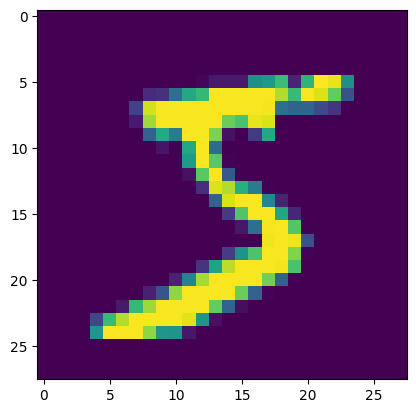

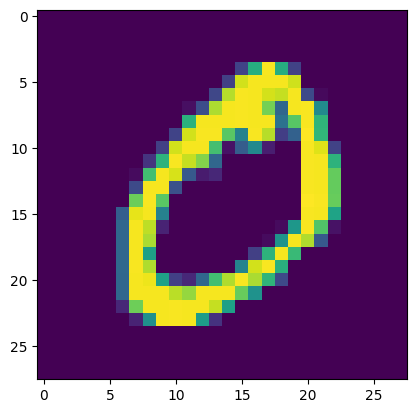

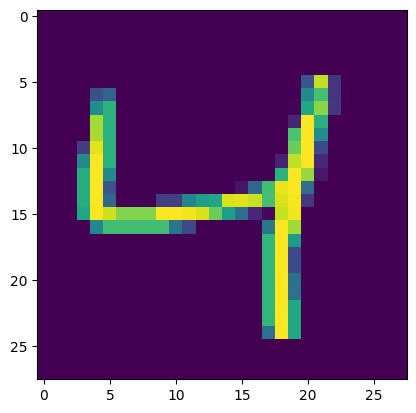

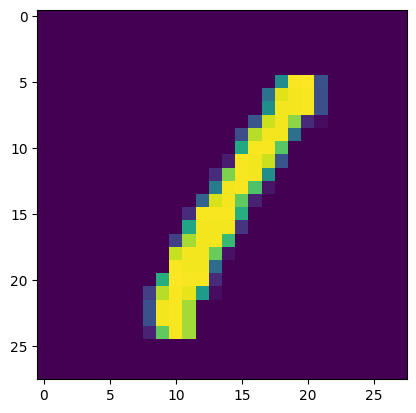

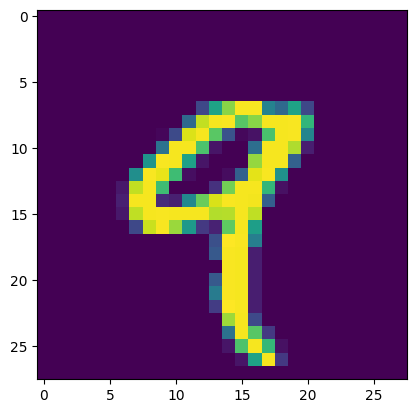

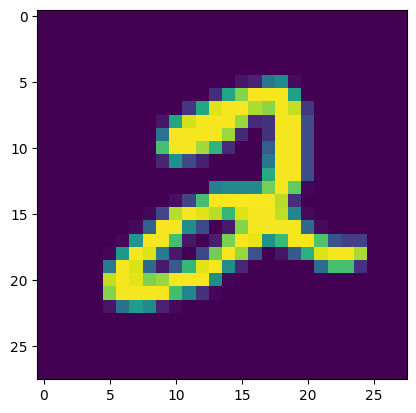

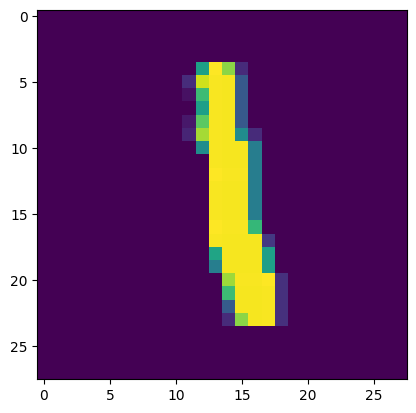

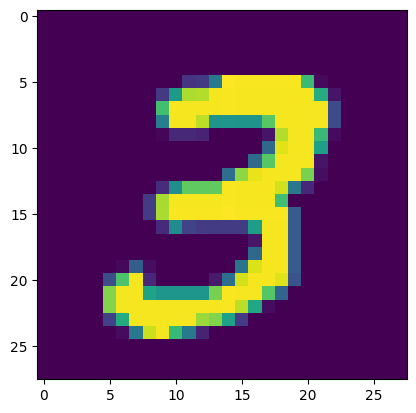

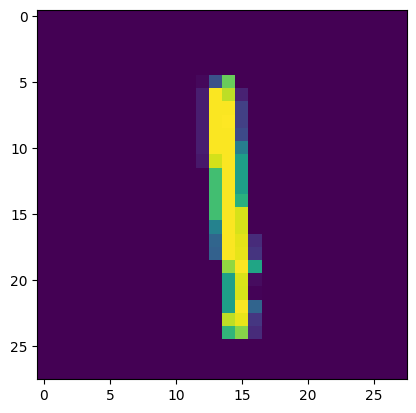

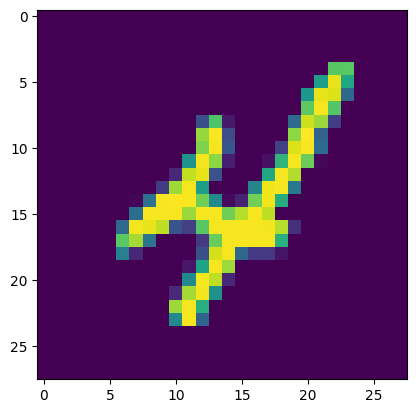

In [186]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [187]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [188]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [189]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [190]:
x_trainraveled.shape
x_testraveled.shape

(10000, 784)

In [196]:
mlp = keras.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [197]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [198]:
history = mlp.fit(x_train, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8215 - loss: 0.6522 - val_accuracy: 0.9701 - val_loss: 0.0987
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9743 - loss: 0.0848 - val_accuracy: 0.9791 - val_loss: 0.0700
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0552 - val_accuracy: 0.9807 - val_loss: 0.0597
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0455 - val_accuracy: 0.9835 - val_loss: 0.0548
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0355 - val_accuracy: 0.9847 - val_loss: 0.0518
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9913 - loss: 0.0305 - val_accuracy: 0.9844 - val_loss: 0.0535
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9928 - loss: 0.0265 - val_accuracy: 0.9841 - val_loss: 0.0525
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.

In [199]:
history.history

{'accuracy': [0.9181555509567261,
  0.975933313369751,
  0.983311116695404,
  0.9856888651847839,
  0.9887333512306213,
  0.9907110929489136,
  0.991266667842865,
  0.9927555322647095,
  0.993755578994751,
  0.9943333268165588],
 'loss': [0.29551637172698975,
  0.07851032167673111,
  0.05554255470633507,
  0.045906081795692444,
  0.03696813806891441,
  0.03140171244740486,
  0.028282739222049713,
  0.024112407118082047,
  0.020963303744792938,
  0.01801467314362526],
 'val_accuracy': [0.9701333045959473,
  0.9790666699409485,
  0.9806666374206543,
  0.9835333228111267,
  0.9847333431243896,
  0.9843999743461609,
  0.9840666651725769,
  0.9861999750137329,
  0.9844666719436646,
  0.987333357334137],
 'val_loss': [0.09871896356344223,
  0.07003426551818848,
  0.059703726321458817,
  0.05478323623538017,
  0.05178311467170715,
  0.05351928621530533,
  0.0524502731859684,
  0.0437886118888855,
  0.05188179761171341,
  0.04973643645644188]}

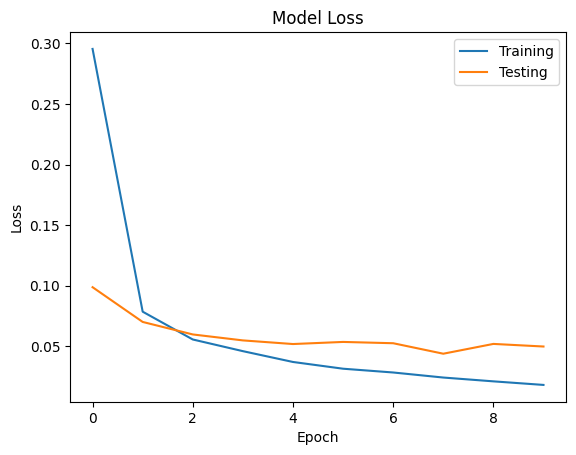

In [200]:
plt.plot(history.history['loss'], label = "Training")
plt.plot(history.history['val_loss'], label = "Testing")
plt.title('Model Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

This is a plot showing the loss of the model versus the epoch of the neural network. This plot shows us where we start to overfit. We can see here, the right epoch to stop at would be at 1 in the plot (epoch 2 in the code above, because the plot starts at zero and the epochs start at 1). We can see that with a convolution neural network, it gets trained easily on the data we are working with.

In [201]:
mlp.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9867 - loss: 0.0379


[0.030757391825318336, 0.9898999929428101]